###### Nombre: Katherine Marcela Cruz Cáceres

# Taller 2

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
!wget https://www.openintro.org/data/csv/loan50.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Para este taller se va a utilizar un archivo de 50 prestamos ofrecidos por un club de prestamos. El archivo consta de 18 variables entre las cuales se encuentran el lugar de residencia del cliente (state), tipo de propiedad de la vivienda (homeownership), ingreso anual del cliente (annual_income), cantidad prestada (loan_amount), intereses (interest_rate), ingreso total (total_income), entre otroa.

In [3]:
loan = pd.read_csv('loan50.csv')
loan.head()

,state,emp_length,term,homeownership,annual_income,verified_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_purpose,loan_amount,grade,interest_rate,public_record_bankrupt,loan_status,has_second_income,total_income
0,NJ,3.0,60,rent,59000.0,Not Verified,0.557525,95131,32894,8,debt_consolidation,22000,B,10.90,0,Current,False,59000.0
1,CA,10.0,36,rent,60000.0,Not Verified,1.305683,51929,78341,2,credit_card,6000,B,9.92,1,Current,False,60000.0
2,SC,NaN,36,mortgage,75000.0,Verified,1.056280,301373,79221,14,debt_consolidation,25000,E,26.30,0,Current,False,75000.0
3,CA,0.0,36,rent,75000.0,Not Verified,0.574347,59890,43076,10,credit_card,6000,B,9.92,0,Current,False,75000.0
4,OH,4.0,60,mortgage,254000.0,Not Verified,0.238150,422619,60490,2,home_improvement,25000,B,9.43,0,Current,False,254000.0


## Punto 1
* Realice un histograma de frecuencia para determinar cual es el mayor tipo de propiedad que tienen los clientes del club.
* A partir de una tabla de frecuencias determine cual es el lugar de residencia donde más clientes viven 

In [ ]:
# Ingrese su código aquí

In [6]:
matriz = pd.DataFrame.to_numpy(loan)

In [5]:
print(np.unique(matriz[:,3]))

['mortgage' 'own' 'rent']


In [7]:
frecuencia = np.unique(loan.homeownership, return_counts=True)
frecuencia

(array(['mortgage', 'own', 'rent'], dtype=object),
 array([26,  3, 21], dtype=int64))

In [16]:
# Usando directamente pandas
df_propiedad = pd.DataFrame({'propiedad':loan.homeownership})
df_propiedad.head()

,propiedad
0,rent
1,rent
2,mortgage
3,rent
4,mortgage


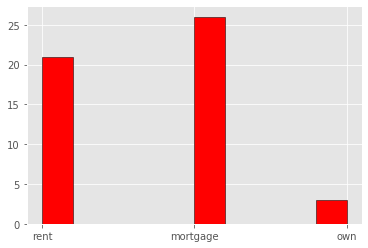

In [42]:
plt.hist(matriz[:,3], color='r', edgecolor='k')
plt.show()

**R/** Mortgage es el tipo de propiedad que mas tienen los clientes del club

In [39]:
frecuencia_state = np.unique(loan.state, return_counts=True)
frecuencia_state

(array(['AZ', 'CA', 'CT', 'FL', 'HI', 'IL', 'IN', 'MA', 'MD', 'MI', 'MN',
        'MO', 'MS', 'NE', 'NH', 'NJ', 'NV', 'NY', 'OH', 'RI', 'SC', 'TX',
        'VA', 'WI', 'WV'], dtype=object),
 array([1, 9, 1, 3, 2, 4, 2, 2, 3, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 5,
        1, 1, 1], dtype=int64))

In [40]:
stats.mode(loan.state)

ModeResult(mode=array(['CA'], dtype=object), count=array([9]))

**R/** el lugar donde más viven es en CA 

## Punto 2
* Calcule el valor promedio, la mediana y la desviación estandar de los intereses prestados por el club.
* Calcule el rango intercuartil de los ingresos anuales de ls clientes.

In [ ]:
# Ingrese su código aquí

In [47]:
df_interest_rate = pd.DataFrame({'propiedad':loan.interest_rate})
df_interest_rate.head()

,propiedad
0,10.90
1,9.92
2,26.30
3,9.92
4,9.43


In [50]:
print(f'El valor promedio es {np.mean(matriz[:,13])}')
print(f'La mediana es {np.median(matriz[:,13])}')
# la distribucion no es tan simetrica, no son iguales 

El valor promedio es 11.567199999999998
La mediana es 9.93


In [57]:
# La desviacion tipica
np.std(matriz[:,13])

5.00133863680515

**R/** La desviación es de  5.00133863680515

In [59]:
# Cuartiles de ingresos Anuales de los clientes
print(f'El cuartil Q1: {np.quantile(matriz[:,17],0.25)}')
print(f'El cuartil Q2: {np.quantile(matriz[:,17],0.5)}')
print(f'El cuartil Q3: {np.quantile(matriz[:,17],0.75)}')

El cuartil Q1: 60000.0
El cuartil Q2: 78750.0
El cuartil Q3: 119000.0


## Punto 3
* Haga un diagrama de cajas para los ingresos totales de los clientes.
* Calcule el coeficiente de asimétria de la distriución así como la curtosis de la misma. ¿Es la ditribución simétrica?

In [ ]:
# Ingrese su código aquí

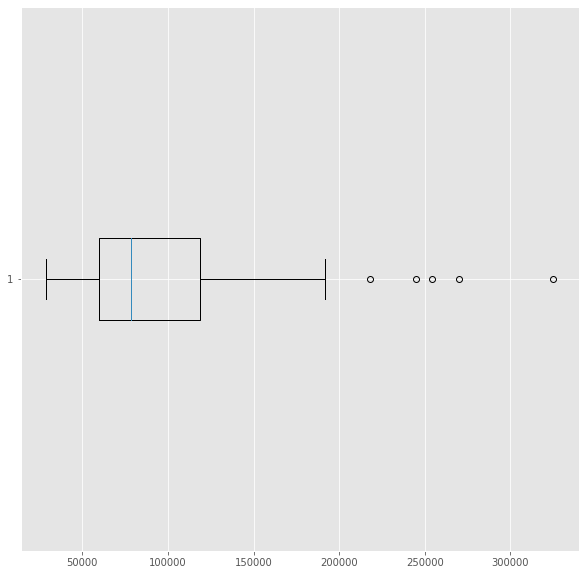

In [61]:
# Diagrama de cajas para los ingresos totales de los clientes
plt.figure(figsize=(10,10))
plt.boxplot(matriz[:,17] ,sym='o', vert=False)
plt.show()

In [63]:
# Coeficiente de asimetría de Fisher de los ingresos totales 
print(f'El coeficiente de asimetría de Fisher es: {stats.skew(matriz[:,17])}')

El coeficiente de asimetría de Fisher es: 1.408474702807808


In [64]:
# Curtosis de los ingresos totales
print(f'Curtosis: {stats.kurtosis(matriz[:,17])}')

Curtosis: 1.3561622374543223


**R/** La distribucion no es Simetrica

## Punto 4
* Haga un diagrama de dispersión entre el número de meses del prestamo (term) y el valor prestado (loan_amount). ¿Cree usted que el club le presta más dinero a un cliente siempre y cuando los meses para pagar el mismo sean mayores?
* Responda la siguiente pregunta:
¿Los intereses del prestamo al clientes son más bajos mientras el cliente tiene mejores ingresos?. Justifique su respuesta.

In [ ]:
# Ingrese su código aquí

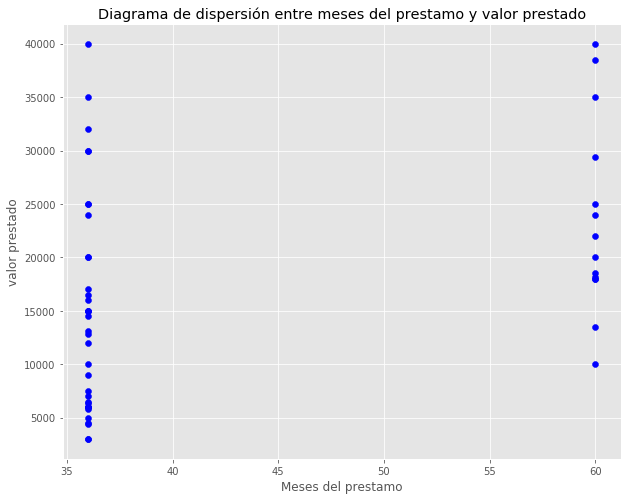

In [65]:
plt.figure(figsize=(10, 8))
plt.scatter(x=matriz[:,2], y=matriz[:,11], c='b', marker='o')
plt.xlabel('Meses del prestamo')
plt.ylabel('valor prestado')
plt.title('Diagrama de dispersión entre meses del prestamo y valor prestado')
plt.show()

**R/** Segun lo obtenido en el grafico no se puede concluir alguna proporción 

## Bono
Haga una tabla de contingencia para determinar el número de clientes por lugar de residencia y tipo de propiedad de la vivienda. Con la tabla anterior responda la siguiente pregunta: ¿Cual es el lugar de residencia que más clientes tienen casa propia?

In [68]:
# Tabla de contingencia 
pd.crosstab(index=matriz[:,0],
            columns=matriz[:,3], margins=True)

col_0,mortgage,own,rent,All
row_0,,,,
AZ,0,1,0,1
CA,2,0,7,9
CT,0,0,1,1
FL,2,0,1,3
HI,1,0,1,2
IL,0,1,3,4
IN,1,1,0,2
MA,1,0,1,2
MD,1,0,2,3


**R/** El lugar de residencia en el que los clientes tienen casa propia es AZ, IL y IN 